# Model Analysis 1

- **Author**: Dan O'Connor
- **Notebook**: 8 of 9

In this notebook I will provide an overview of model performance on all the success metrics. 

## Table of Contents


In [51]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Below is the overview on how the models peformed purely based on accuracy.

In [27]:
accuracy_df = pd.read_csv('Data/accuracy_df4.csv', index_col = 'Model')

Below is the overview on how the models peformed purely based on accuracy.

In [28]:
accuracy_df

,Baseline Accuracy,Optimized Accuracy
Model,,
Baseline,0.29,NaN
Logistic Regression,0.66,0.66
KNN,0.62,0.63
Random Forest,0.64,0.64
Decision Tree,0.47,0.52
Neural Net,0.65,0.67
SMOTE Neural Net,0.60,0.63


Below I show the moodel accuracies (optimized).

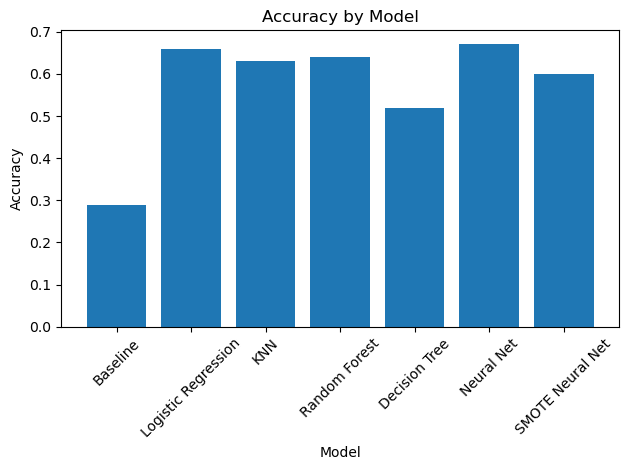

In [61]:

models = ['Baseline', 'Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'Neural Net', 'SMOTE Neural Net']
baseline_acc = 0.29
optimized_acc = [np.nan, 0.66, 0.63, 0.64, 0.52, 0.67, 0.6]

# Create the bar graph
plt.bar(models, [baseline_acc] + optimized_acc[1:])
plt.title('Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.savefig('Optimized_accuries.png')
plt.tight_layout()
plt.show()

Something went wrong with the metrics on the logistic regression. I have still included it in this analysis. At a later time I will inspect the process and fix it. In the graphic below I have excluded it from the model accuracies.

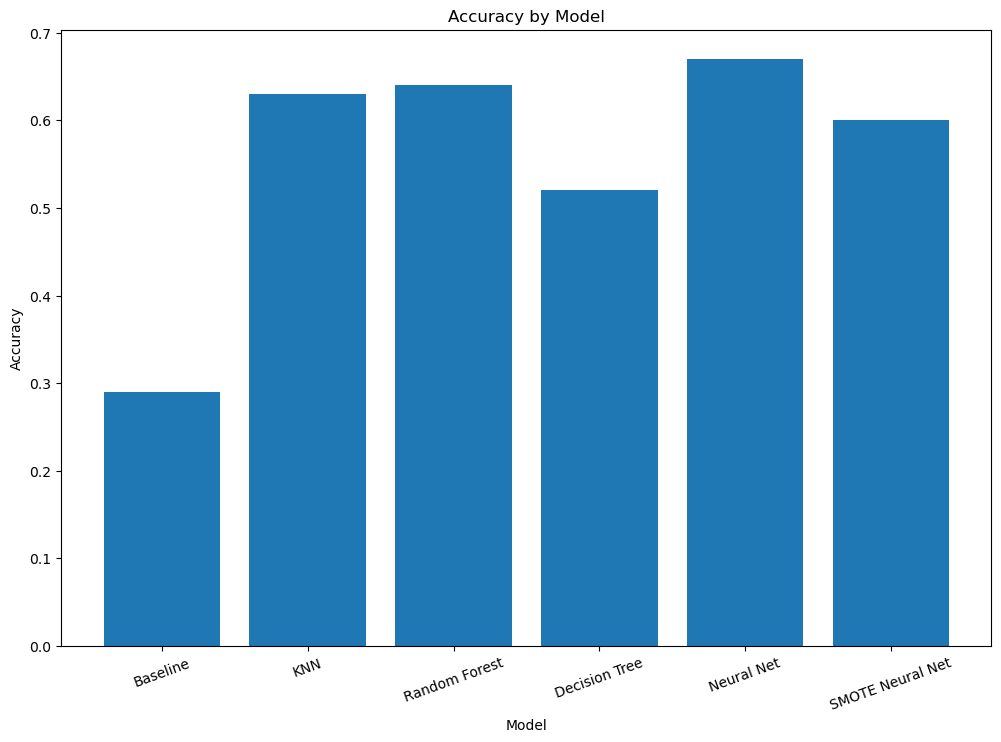

In [67]:
models = ['Baseline',  'KNN', 'Random Forest', 'Decision Tree', 'Neural Net', 'SMOTE Neural Net']
baseline_acc = 0.29
optimized_acc = [np.nan, 0.63, 0.64, 0.52, 0.67, 0.6]

# Create the bar graph

plt.figure(figsize=(12, 8))
plt.bar(models, [baseline_acc] + optimized_acc[1:])
plt.title('Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=20)

plt.savefig('Optimized_accuries_no_lr.png')
plt.show()

### Model Performance per Genre

In [30]:
#read in the scores df
scores_df = pd.read_csv('Data/scores_df4.csv', index_col = 'Genres')

In [31]:
#scores loaded with an additional index column
scores_df.drop(columns='index',inplace=True)

The following graphic will be useful to keep in mind when looking at the how the models perform on recall, precision, and f1.

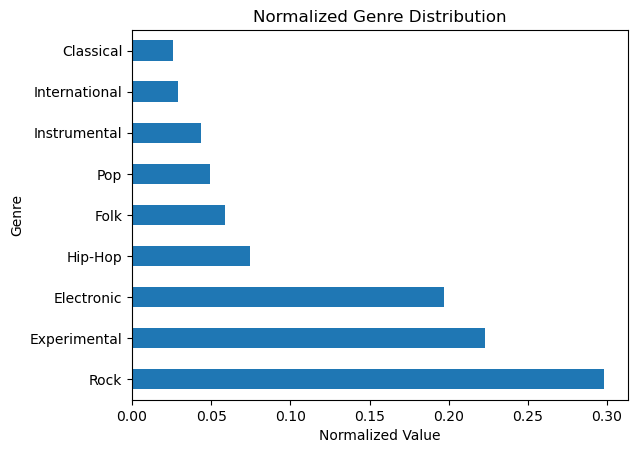

In [32]:
# plotting normalized genre dist.
subset_model_df['genre_top'].value_counts(normalize=True).plot(kind='barh') 
plt.title('Normalized Genre Distribution')
plt.ylabel('Genre')
plt.xlabel('Normalized Value')
plt.show()

In [33]:
scores_df

,baseline_recall,baseline_f1,baseline_precision,baseline_dt_recall,baseline_dt_f1-score,baseline_dt_precision,optimized_dt_recall,optimized_dt_f1-score,optimized_dt_precision,baseline_rf_recall,...,baseline_nn_precision,optimized_nn_recall,optimized_nn_f1-score,optimized_nn_precision,baseline_smote_nn_recall,baseline_smote_nn_f1-score,baseline_smote_nn_precision,optimized_smote_nn_recall,optimized_smote_nn_f1-score,optimized_smote_nn_precision
Genres,,,,,,,,,,,,,,,,,,,,,
Classical,0.025893,0.025846,0.025840,0.500000,0.511628,0.523810,0.538961,0.549669,0.560811,0.711039,...,0.723926,0.701299,0.794118,0.915254,0.737013,0.797891,0.869732,0.737013,0.797891,0.869732
Electronic,0.197050,0.197048,0.197078,0.456253,0.456740,0.457228,0.585574,0.513761,0.457638,0.688007,...,0.630872,0.705933,0.659227,0.618318,0.635510,0.637005,0.638508,0.635510,0.637005,0.638508
Experimental,0.223475,0.223397,0.223354,0.443062,0.452707,0.462781,0.531297,0.489831,0.454370,0.720211,...,0.625729,0.721342,0.672526,0.629898,0.716063,0.639394,0.577555,0.716063,0.639394,0.577555
Folk,0.058978,0.058946,0.058957,0.378031,0.375620,0.373239,0.339515,0.380192,0.431942,0.509272,...,0.549928,0.557775,0.581845,0.608087,0.553495,0.586546,0.623794,0.553495,0.586546,0.623794
Hip-Hop,0.074407,0.074338,0.074309,0.384009,0.384442,0.384876,0.289414,0.364023,0.490458,0.502252,...,0.655776,0.591216,0.657483,0.740480,0.613739,0.664634,0.724734,0.613739,0.664634,0.724734
Instrumental,0.043921,0.043933,0.043986,0.182692,0.175439,0.168739,0.148077,0.182681,0.238390,0.144231,...,0.358839,0.209615,0.272500,0.389286,0.350000,0.350674,0.351351,0.350000,0.350674,0.351351
International,0.029491,0.029453,0.029457,0.256484,0.244505,0.233596,0.077810,0.135678,0.529412,0.216138,...,0.514124,0.389049,0.516252,0.767045,0.469741,0.565972,0.711790,0.469741,0.565972,0.711790
Pop,0.048599,0.048621,0.048680,0.097770,0.093137,0.088924,0.000000,0.000000,0.000000,0.010292,...,0.260870,0.000000,0.000000,0.000000,0.385935,0.249861,0.184729,0.385935,0.249861,0.184729
Rock,0.297893,0.297935,0.298007,0.651720,0.652640,0.653563,0.750141,0.700922,0.657765,0.831641,...,0.763994,0.837281,0.773378,0.718538,0.664411,0.758288,0.883058,0.664411,0.758288,0.883058


#### Recall Scores

In [34]:
optimized_recall = scores_df.filter(regex=r'optimized.*recall$') #search scores_df for optiimized recall

baseline_recall = scores_df['baseline_recall'] 

recall_scores = pd.concat([ baseline_recall, optimized_recall], axis=1) #merge the above two metrics.

Recall measures the proportion of true positive cases that were correctly identified by the model out of all actual positive cases. 

Recall = True Positives / (True Positives + False Negatives)

For the time being, ignore the logistic regression. Note that the SMOTE trainedd model peformed particularly well in several of the underrepresented classes: instrumental and pop and international.

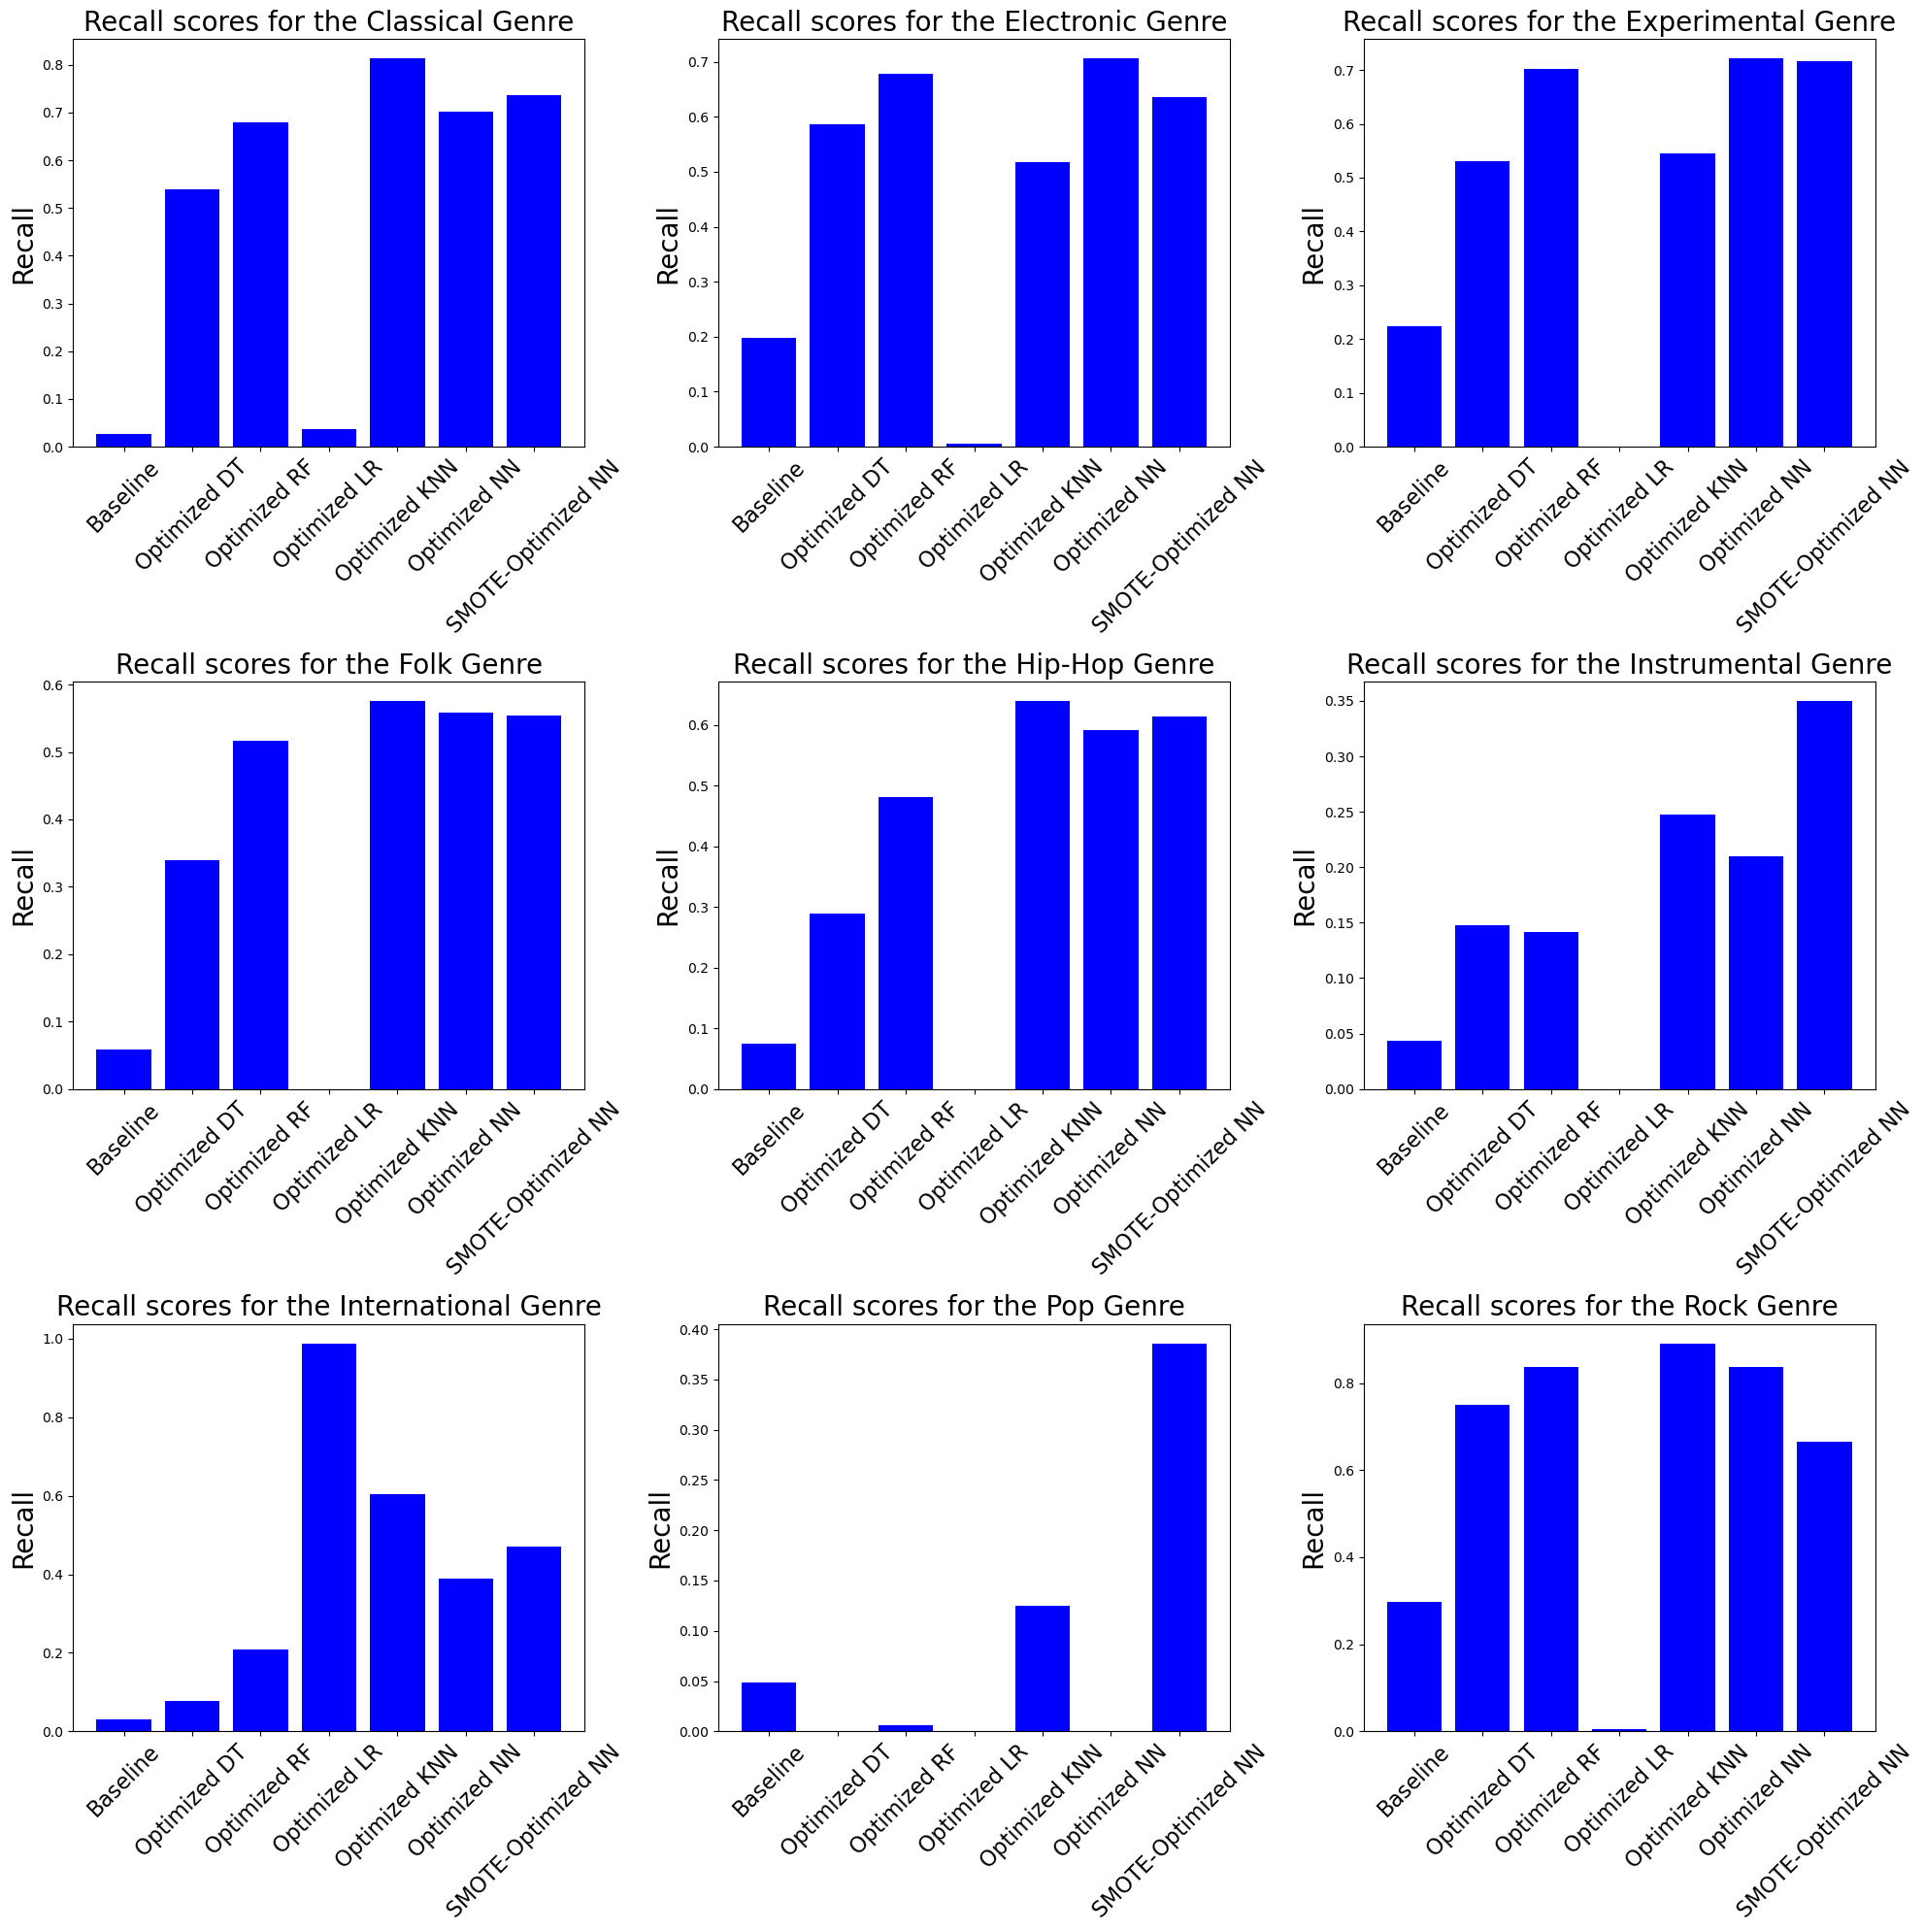

In [35]:
#create subplots of the recall per genre.
genres = ['Classical', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, genre in enumerate(genres): 
    row = i // 3 #will be either 0 1 2
    col = i % 3 #will be either 0 1 2 , thereby creating the 3x3
    
    scores = recall_scores.loc[genre].values

    # model names
    models = ['Baseline', 'Optimized DT', 'Optimized RF','Optimized LR', 'Optimized KNN','Optimized NN','SMOTE-Optimized NN']

    # Create a bar graph for the genre
    axs[row, col].bar(models, scores, color='blue')
    axs[row, col].set_ylabel('Recall', fontsize=20)
    axs[row, col].set_title(f'Recall scores for the {genre} Genre', fontsize=20)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=16)

plt.tight_layout()
plt.show()


Below shows the weighted average recall. The optimized NN performed overall the best, even though it had low recall in pop, instrumental, and international.

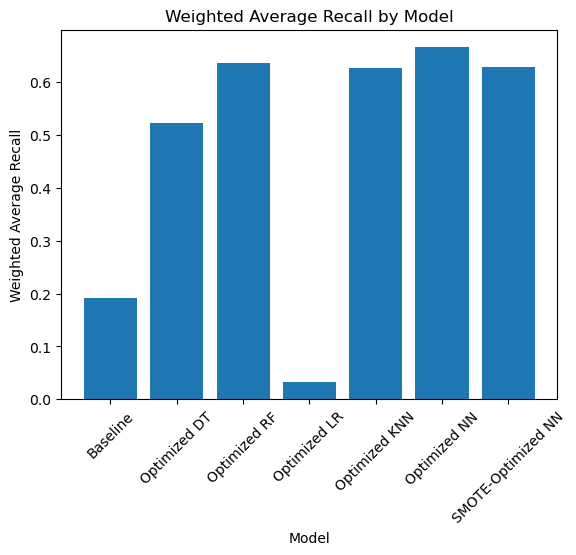

In [36]:
#plot weighted avg.
weighted_recall = recall_scores.loc['Weighted Avg'].values
plt.bar(models, weighted_recall)
plt.title('Weighted Average Recall by Model')
plt.xlabel('Model')
plt.ylabel('Weighted Average Recall')
plt.xticks(rotation=45)
plt.show()


#### Precision

Precision is a performance metric that measures the proportion of true positive predictions out of all positive predictions made by a model. 


Precision = True Positives / (True Positives + False Positives)

Once again, ignore the logistic regression metrics. Some stand outs: random forest near 0.8 precision for hip-hop and international. SMOTE trained NN had the highest precision in the largest genre rock at around 0.8. 

In [37]:
optimized_precision = scores_df.filter(regex=r'optimized.*precision$') #filter by optimized prec
baseline_precision = scores_df['baseline_precision'] #find baseeline prec

precision_scores = pd.concat([ baseline_precision, optimized_precision], axis=1) #merge the two

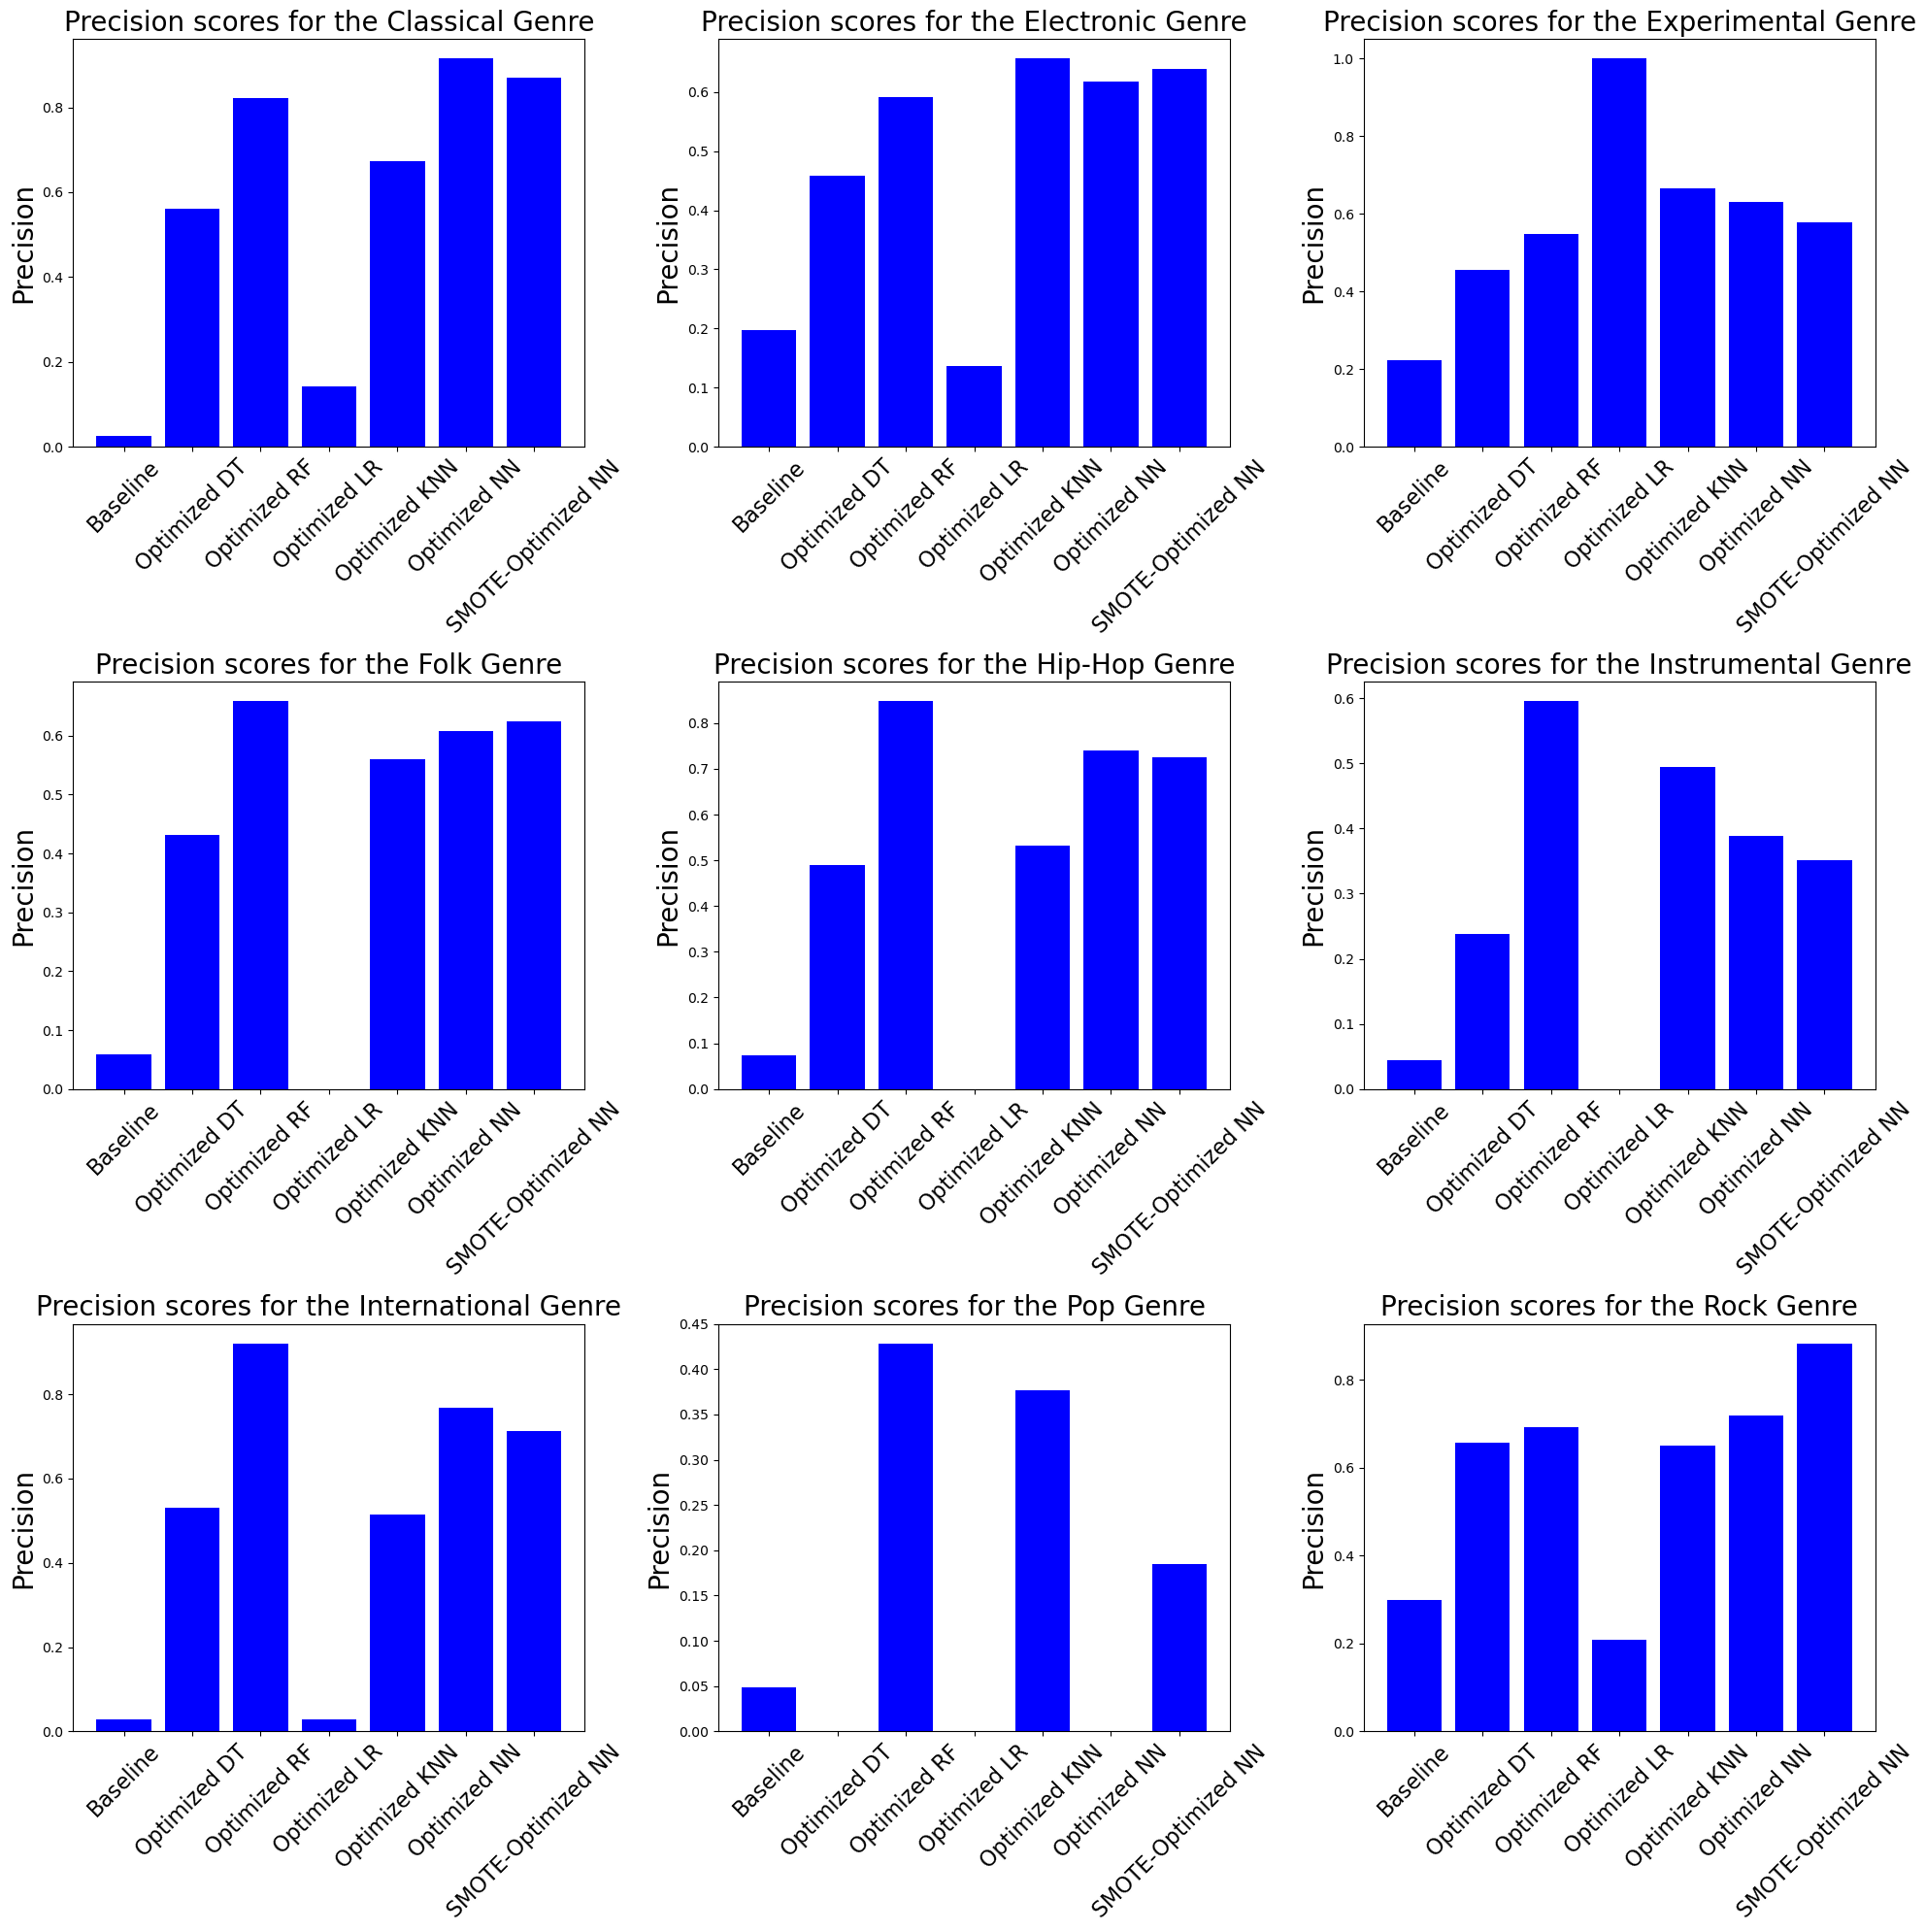

In [38]:
genres = ['Classical', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

#same subplot setup as before
for i, genre in enumerate(genres):
    row = i // 3
    col = i % 3
    
    scores = precision_scores.loc[genre].values

    # model names
    models = ['Baseline', 'Optimized DT', 'Optimized RF','Optimized LR', 'Optimized KNN','Optimized NN','SMOTE-Optimized NN']

    # Create a bar graph for the genre
    axs[row, col].bar(models, scores, color='blue')
    axs[row, col].set_ylabel('Precision', fontsize=20)
    axs[row, col].set_title(f'Precision scores for the {genre} Genre', fontsize=20)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=16)

plt.tight_layout()
plt.show()


Below shows the weighted precision, which takes into account the number of samples per genre. The SMOTE optimized NN performed overall the best in terms of precision, but the KNN, NN, and RF all did well.

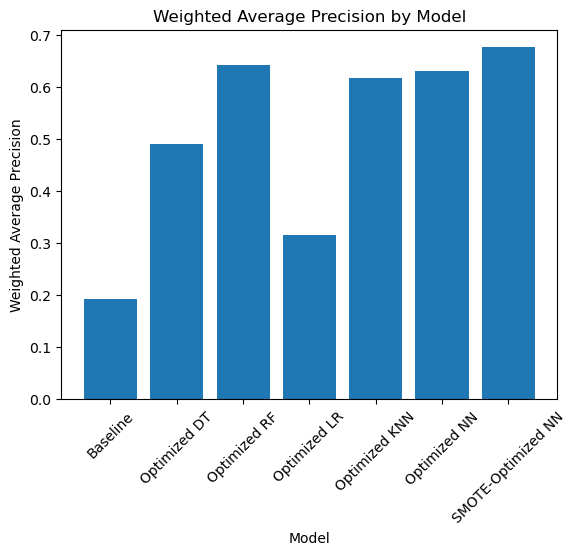

In [39]:
#plot weighted precisions
weighted_precision= precision_scores.loc['Weighted Avg'].values
plt.bar(models, weighted_precision)
plt.title('Weighted Average Precision by Model')
plt.xlabel('Model')
plt.ylabel('Weighted Average Precision')
plt.xticks(rotation=45)
plt.show()


#### F1 Scores

F1 score is a measure of a model's accuracy that combines precision and recall. It is the harmonic mean of precision and recall, with a value between 0 and 1, where 1 is the best possible score.

F1 = 2 * (precision * recall) / (precision + recall)

The neural net and SMOTE NN hhad very similiar f1 scores per genre, however the main difference is in the pop genre where SMOTE excelled. The NN had an F1 of 0 in pop.

In [40]:
optimized_f1 = scores_df.filter(regex=r'optimized.*f1-score$')
baseline_f1 = scores_df['baseline_f1']

f1_scores = pd.concat([ baseline_f1, optimized_f1], axis=1)

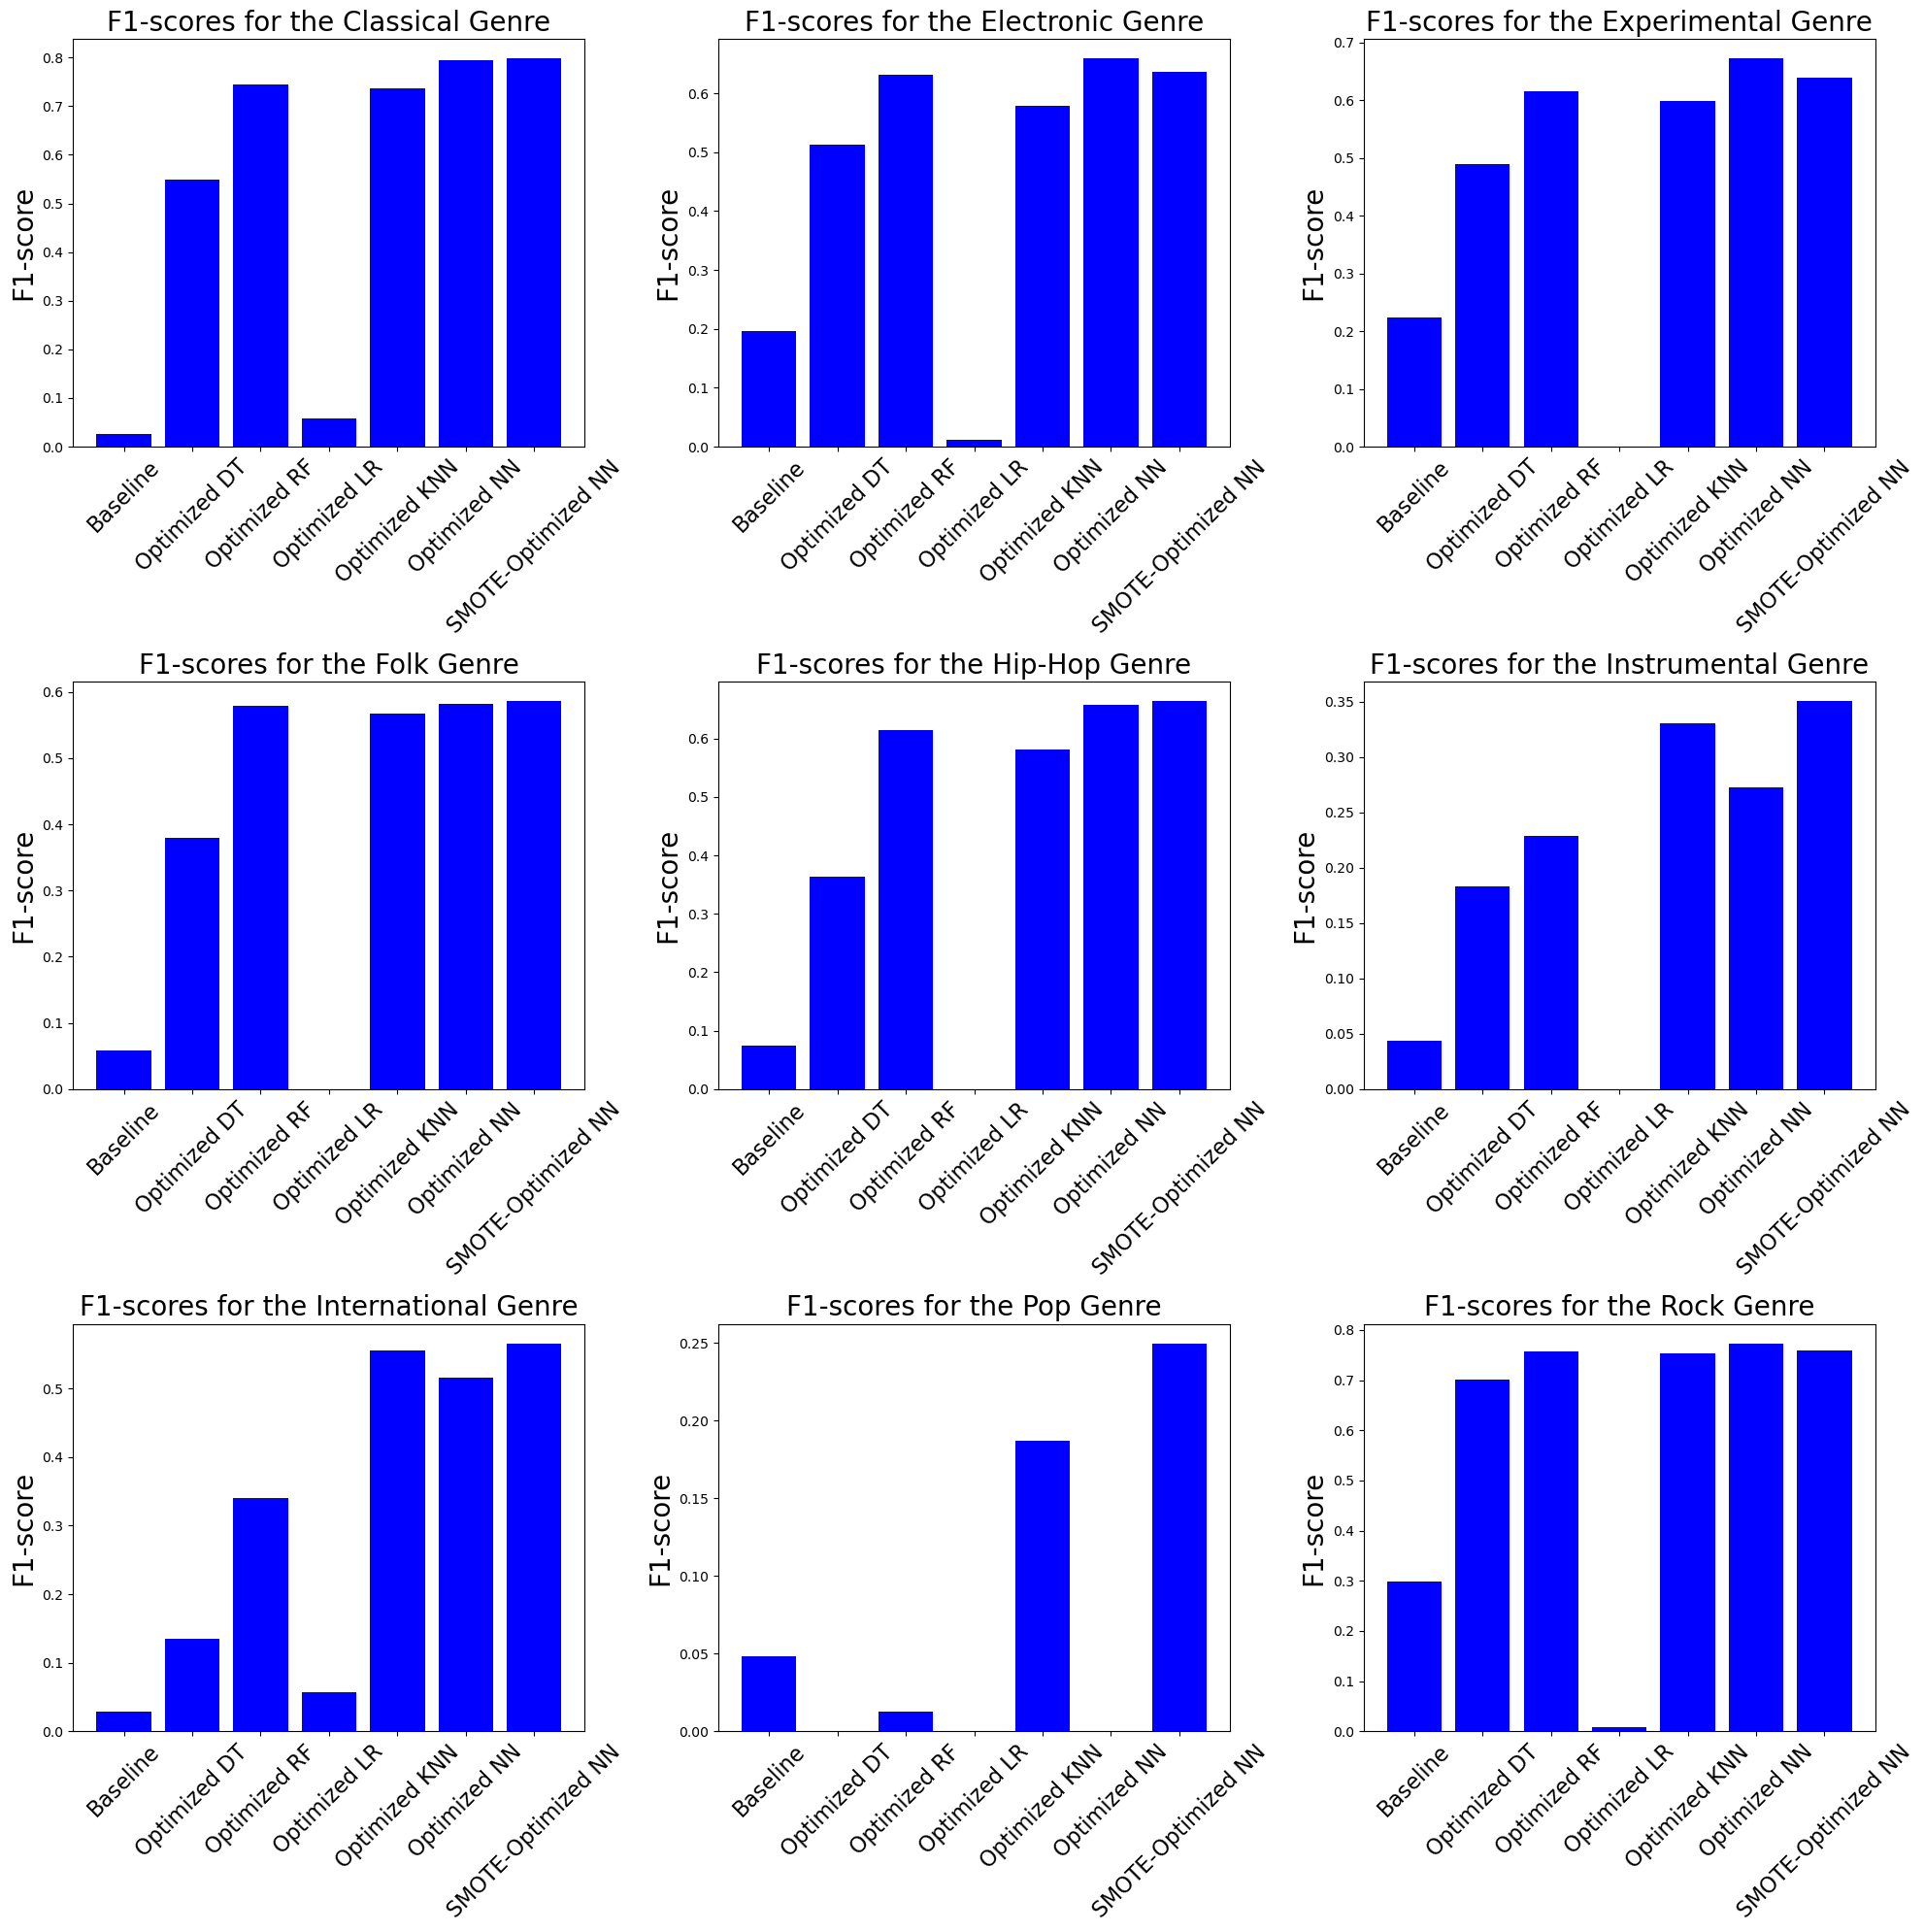

In [45]:
genres = ['Classical', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, genre in enumerate(genres):
    row = i // 3
    col = i % 3
    
    scores = f1_scores.loc[genre].values

    # model names
    models = ['Baseline', 'Optimized DT', 'Optimized RF','Optimized LR', 'Optimized KNN','Optimized NN','SMOTE-Optimized NN']

    # Create a bar graph for the genre
    axs[row, col].bar(models, scores, color='blue')
    axs[row, col].set_ylabel('F1-score', fontsize=20)
    axs[row, col].set_title(f'F1-scores for the {genre} Genre', fontsize=20)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=16)

plt.tight_layout()
plt.savefig('f1_scores.png')
plt.show()


Will update this graph once the logistic regression is fixed.

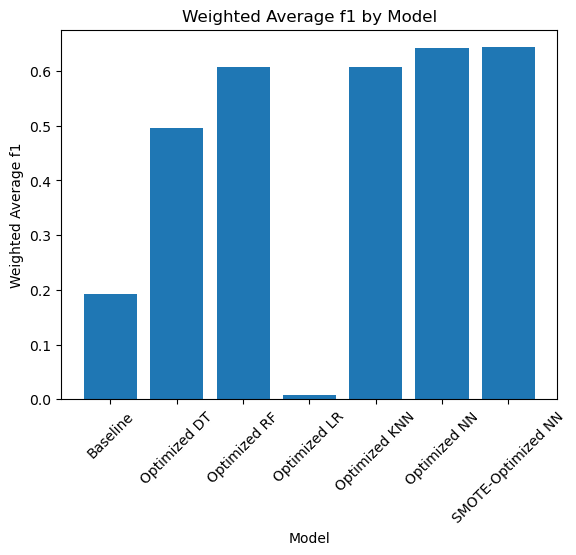

In [43]:
weighted_f1 = f1_scores.loc['Weighted Avg'].values
plt.bar(models, weighted_f1)
plt.title('Weighted Average f1 by Model')
plt.xlabel('Model')
plt.ylabel('Weighted Average f1')
plt.xticks(rotation=45)
plt.show()


Below shows the same graphic as above except without logistic regression. All models performed significantly better than the baseline in terms of both accuracy and the other success metrics.

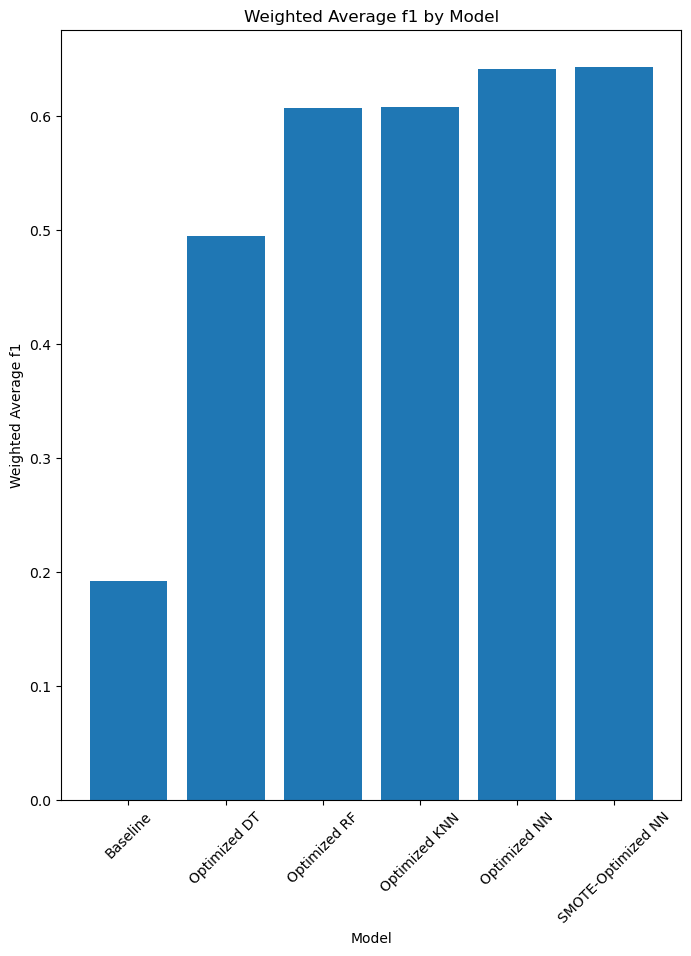

In [66]:
weighted_f1 = f1_scores.loc['Weighted Avg'][[0, 1, 2, 4, 5, 6]].values
models = ['Baseline', 'Optimized DT', 'Optimized RF', 'Optimized KNN', 'Optimized NN', 'SMOTE-Optimized NN']
plt.figure(figsize=(8, 10))
plt.bar(models, weighted_f1)
plt.title('Weighted Average f1 by Model')
plt.xlabel('Model')
plt.ylabel('Weighted Average f1')
plt.xticks(rotation=45)
plt.savefig('weighted_f1.png')
plt.show()